<a href="https://colab.research.google.com/github/ernie-Griffiths/Determining-the-Validity-of-Genetically-Engineered-Crops-in-a-Warming-Climate-Using-Machine-Learning/blob/main/Concept_proof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import pickle

import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn import ensemble

from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 100)

In [ ]:
GBR_model = pickle.load(open("/content/drive/MyDrive/University of reading/MSC FINAL project/Product model./GBR_model.sav", 'rb'))
KNN_model = pickle.load(open("/content/drive/MyDrive/University of reading/MSC FINAL project/Product model./KNN_model.sav", 'rb'))
RF_model = pickle.load(open("/content/drive/MyDrive/University of reading/MSC FINAL project/Product model./RF_model.sav", 'rb'))

In [ ]:
GBR_model

GradientBoostingRegressor(learning_rate=0.01, max_depth=6, min_samples_split=7,
                          n_estimators=1000)

In [ ]:
Phenotype_Soil_Weather_Data = pd.read_csv("/content/drive/MyDrive/University of reading/MSC FINAL project/Data/Data Files/Finalised data/FeatureSelected_Phenotype_Soil_Weather_Data.csv",index_col=[0])

In [ ]:
Phenotype_Soil_Weather_Data = Phenotype_Soil_Weather_Data.dropna()

In [ ]:
Created_Data = Phenotype_Soil_Weather_Data.sample(n=10)

In [ ]:
Created_Data

,Field-Location,Source,Pedigree,Family,Tester,Replicate,Block,Range,Pass,Anthesis [MM/DD/YY],Silking [MM/DD/YY],Anthesis [days],Silking [days],Plant Height [cm],Ear Height [cm],Stand Count [# of plants],Grain Moisture [%],Test Weight [lbs],Plant Month,Harvest Month,Location,E Depth,1:1 Soil pH,WDRF Buffer pH,1:1 S Salts mmho/cm,Texture No,Organic Matter LOI %,Nitrate-N ppm N,lbs N/A,Potassium ppm K,Sulfate-S ppm S,Calcium ppm Ca,Magnesium ppm Mg,Sodium ppm Na,CEC/Sum of Cations me/100g,%H Sat,%K Sat,%Ca Sat,%Mg Sat,%Na Sat,Mehlich P-III ppm P,% Sand,% Silt,% Clay,Texture,Temperature [C],Dew Point [C],Relative Humidity [%],Solar Radiation [W/m2],Rainfall [mm],Wind Speed [m/s],Wind Direction [degrees],Wind Gust [m/s],Soil Temperature [C],Seed Success factor
10064,TXH2,17SGTF:LH195:1681,PHW65_MOG_0190/LH195,PHW65_MOG,LH195,2.0,5,12.0,30.0,5/31/19,5/30/19,72.0,71.0,206.0,76.0,59.0,11.75,61.656,3.0,8.0,TXH2,12.0,8.4,7.2,0.13,2.0,1.1,15.8,57.0,172.0,6.2,5476.0,230.0,23.0,29.8,0.0,1.0,92.0,6.0,0.0,11.0,38.0,34.0,28.0,Clay Loam,24.761555,18.790331,72.257038,231.512891,0.047307,0.612856,139.331982,3.777161,30.027183,1.728686
6903,NYH2,WIPV18/30422,PHW65_MOG_0067/PHT69,PHW65_MOG,PHT69,2.0,4,10.0,52.0,8/8/19,8/8/19,77.0,77.0,284.0,164.0,50.0,21.10,54.900,5.0,12.0,NYH2,12.0,7.8,7.2,0.34,2.0,3.6,31.8,115.0,75.0,7.7,2306.0,271.0,10.0,14.0,0.0,1.0,82.0,16.0,0.0,10.0,48.0,24.0,28.0,Sandy Clay Loam,13.466197,7.857401,71.652133,162.668554,0.040654,0.979691,206.122836,2.736961,14.722393,1.848192
7295,NYH3,17SGTF:LH195:1631,PHW65_MOG_0082/LH195,PHW65_MOG,LH195,1.0,1,2.0,98.0,8/8/19,8/7/19,77.0,76.0,224.0,119.0,42.0,22.10,52.100,5.0,12.0,NYH3,12.0,7.7,7.2,0.23,2.0,3.6,15.3,55.0,55.0,8.2,2349.0,261.0,8.0,14.1,0.0,1.0,83.0,15.0,0.0,8.0,48.0,26.0,26.0,Sandy Clay Loam,13.528683,7.685301,70.631504,159.231589,0.028662,1.092795,212.885332,2.925362,14.763023,2.175635
1612,GAH2,17SGTF:LH195:0801,PHW65_MOG_0138/LH195,PHW65_MOG,LH195,1.0,2,7.0,3.0,6/15/19,6/14/19,64.0,63.0,235.0,114.0,54.0,13.00,57.100,4.0,9.0,GAH2,12.0,5.7,6.8,0.23,2.0,1.2,22.4,81.0,71.0,4.2,420.0,53.0,6.0,4.8,43.0,4.0,43.0,9.0,1.0,38.0,68.0,16.0,16.0,Sandy Loam,23.337889,5.232939,67.144586,289.387280,0.055125,1.395703,155.748250,2.827885,14.801403,2.849765
6755,NYH2,WIPV17/30874,PHN11_PHW65_0274/PHT69,PHN11_PHW65,PHT69,1.0,3,8.0,4.0,7/31/19,7/31/19,69.0,69.0,239.0,122.0,54.0,18.60,55.400,5.0,12.0,NYH2,12.0,7.8,7.2,0.34,2.0,3.6,31.8,115.0,75.0,7.7,2306.0,271.0,10.0,14.0,0.0,1.0,82.0,16.0,0.0,10.0,48.0,24.0,28.0,Sandy Clay Loam,13.466197,7.857401,71.652133,162.668554,0.040654,0.979691,206.122836,2.736961,14.722393,3.191302
7740,NYH3,17SGTF:LH195:0343,MO44_PHW65_0110/LH195,MO44_PHW65,LH195,2.0,4,11.0,58.0,8/7/19,8/8/19,76.0,77.0,229.0,113.0,49.0,24.70,64.000,5.0,12.0,NYH3,12.0,7.7,7.2,0.23,2.0,3.6,15.3,55.0,55.0,8.2,2349.0,261.0,8.0,14.1,0.0,1.0,83.0,15.0,0.0,8.0,48.0,26.0,26.0,Sandy Clay Loam,13.528683,7.685301,70.631504,159.231589,0.028662,1.092795,212.885332,2.925362,14.763023,3.075930
4623,MNH1,WIPV17/30744,MO44_PHW65_0392/PHT69,MO44_PHW65,PHT69,1.0,4,9.0,17.0,8/6/19,8/6/19,64.0,64.0,262.0,109.0,74.0,23.70,57.100,6.0,11.0,MNH1,12.0,6.3,6.6,0.21,2.0,5.2,24.0,87.0,262.0,9.1,3036.0,539.0,14.0,24.6,17.0,3.0,62.0,18.0,0.0,69.0,40.0,26.0,34.0,Clay Loam,14.354844,9.574187,74.451064,192.038883,0.070858,1.700662,194.550796,3.861767,19.737359,1.839108
6978,NYH2,WIPV18/30646,PHW65_MOG_0517/PHT69,PHW65_MOG,PHT69,2.0,4,12.0,28.0,7/30/19,8/1/19,68.0,70.0,234.0,132.0,52.0,20.00,57.000,5.0,12.0,NYH2,12.0,7.8,7.2,0.34,2.0,3.6,31.8,115.0,75.0,7.7,2306.0,271.0,10.0,14.0,0.0,1.0,82.0,16.0,0.0,10.0,48.0,24.0,28.0,Sandy Clay Loam,13.466197,7.857401,71.652133,162.668554,0.040654,0.979691,206.122836,2.736961,14.722393,2.531488
4450,MNH1,17SGTF:LH195:1655,PHW65_MOG_0133/LH195,PHW65_MOG,LH195,1.0,3,6.0,41.0,8/9/19,8/13/19,67.0,71.0,255.0,125.0,80.0,33.70,46.300,6.0,11.0,MNH1,12.0,6.3,6.6,0.21,2.0,5.2,24.0,87.0,262.0,9.1,3036.0,539.0,14.0,24.6,17.0,3.0,62.0,18.0,0.0,69.0,40.0,26.0,34.0,Clay Loam,14.354844,9.574187,

In [ ]:
Columns = ["Replicate","Block","Range","Pass","Anthesis [MM/DD/YY]","Silking [MM/DD/YY]","Anthesis [days]", "Silking [days]","Plant Height [cm]","Ear Height [cm]","Stand Count [# of plants]","Grain Moisture [%]","Test Weight [lbs]","Plant Month","Harvest Month","Location","E Depth","1:1 Soil pH","WDRF Buffer pH","1:1 S Salts mmho/cm","Texture No","Organic Matter LOI %","Nitrate-N ppm N","lbs N/A","Potassium ppm K","Sulfate-S ppm S","Calcium ppm Ca","Magnesium ppm Mg","Sodium ppm Na","CEC/Sum of Cations me/100g","%H Sat","%K Sat","%Ca Sat","%Mg Sat","%Na Sat","Mehlich P-III ppm P","% Sand","% Silt","% Clay","Texture","Temperature [C]","Dew Point [C]","Relative Humidity [%]","Solar Radiation [W/m2]","Rainfall [mm]","Wind Speed [m/s]","Wind Direction [degrees]","Wind Gust [m/s]","Soil Temperature [C]"]

In [ ]:
Created_Data['Texture'] = pd.factorize(Created_Data['Texture'])[0] + 1
Predict_data = Created_Data.drop(["Seed Success factor","Field-Location",	"Source","Pedigree",	"Family",	"Tester",	"Replicate",	"Block","Anthesis [MM/DD/YY]","Silking [MM/DD/YY]","Location"], axis = 1)

In [ ]:
GBRPredictions = GBR_model.predict(Predict_data)
RFPredictions = RF_model.predict(Predict_data)
KNNPredictions = KNN_model.predict(Predict_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:

Datadict = {'Sucess Factor': Created_Data['Seed Success factor'],
            'GBR_Prediction': GBRPredictions,
            'RF_Prediction': RFPredictions,
            'KNN_Prediction': KNNPredictions}


Plot_Data = pd.DataFrame(data= Datadict)

In [ ]:
Plot_Data

,Sucess Factor,GBR_Prediction,RF_Prediction,KNN_Prediction
10064,1.728686,1.640694,1.631895,1.691667
6903,1.848192,1.989468,2.583130,1.649167
7295,2.175635,2.073447,2.178978,1.696333
1612,2.849765,2.813094,2.761403,1.691167
6755,3.191302,2.875306,2.839330,1.649167
7740,3.075930,3.114659,3.055011,1.691667
4623,1.839108,1.790786,1.789458,1.691667
6978,2.531488,2.731946,2.662788,1.649167
4450,1.149166,1.424220,1.441311,1.691667
835,2.112486,1.806357,2.074960,1.783500


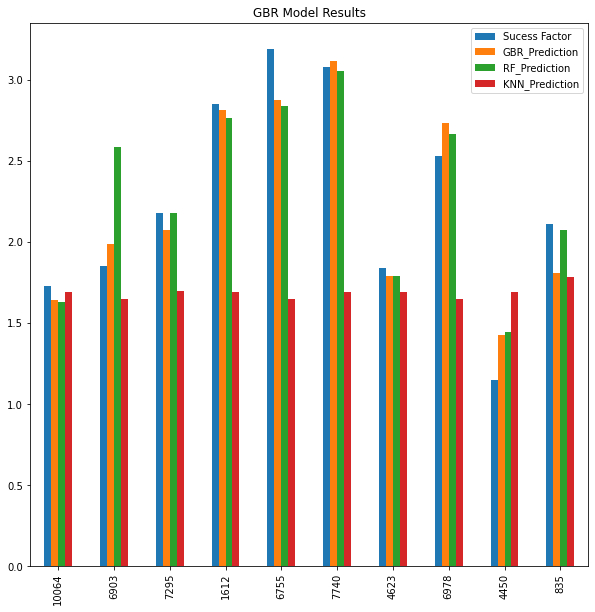

In [ ]:
Plot_Data.plot(kind="bar", title = "GBR Model Results", figsize = (10,10),legend = "False")

In [ ]:
Created_Data[Columns] = Created_Data[Columns].sample(frac=1).values

In [ ]:
Created_Data['Texture'] = pd.factorize(Created_Data['Texture'])[0] + 1
Predict_data = Created_Data.drop(["Seed Success factor","Field-Location",	"Source","Pedigree",	"Family",	"Tester",	"Replicate",	"Block","Anthesis [MM/DD/YY]","Silking [MM/DD/YY]","Location"], axis = 1)

In [ ]:
GBRPredictions = GBR_model.predict(Predict_data)
RFPredictions = RF_model.predict(Predict_data)
KNNPredictions = KNN_model.predict(Predict_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:

Datadict = {'GBR_Prediction': GBRPredictions}
Plot_Data = pd.DataFrame(data= Datadict)

In [ ]:
Plot_Data

,GBR_Prediction
0,1.790786
1,2.875306
2,1.989468
3,1.424220
4,2.073447
5,1.806357
6,3.114659
7,2.813094
8,1.640694
9,2.731946


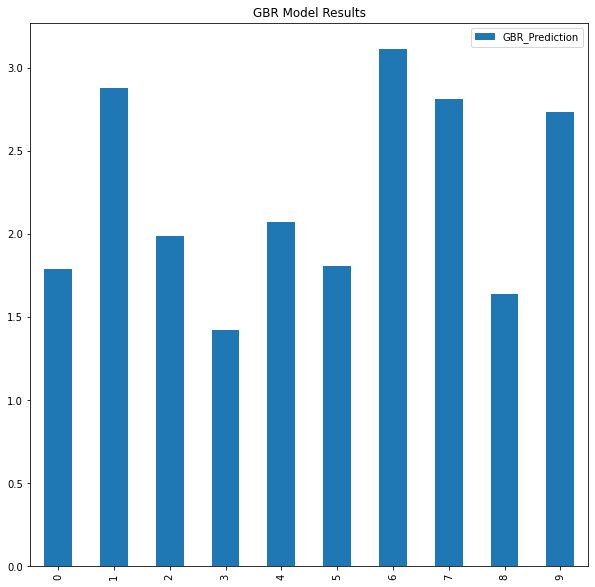

In [ ]:
Plot_Data.plot(kind="bar", title = "GBR Model Results", figsize = (10,10),legend = "False")

In [ ]:
FamilyDict = dict(tuple(Phenotype_Soil_Weather_Data.groupby('Family')))

In [ ]:
Plant_sample1 = FamilyDict["PHW65_MOG"].sample(n=4)
Plant_sample2 = FamilyDict["PHN11_PHW65"].sample(n=4)
Plant_sample3 = FamilyDict["MO44_PHW65"].sample(n=4)
Plant_sample1[["Temperature [C]","Dew Point [C]","Relative Humidity [%]","Solar Radiation [W/m2]","Rainfall [mm]","Wind Speed [m/s]","Wind Direction [degrees]","Wind Gust [m/s]","Soil Temperature [C]"]] +=5
Plant_sample2[["Temperature [C]","Dew Point [C]","Relative Humidity [%]","Solar Radiation [W/m2]","Rainfall [mm]","Wind Speed [m/s]","Wind Direction [degrees]","Wind Gust [m/s]","Soil Temperature [C]"]] +=5
Plant_sample3[["Temperature [C]","Dew Point [C]","Relative Humidity [%]","Solar Radiation [W/m2]","Rainfall [mm]","Wind Speed [m/s]","Wind Direction [degrees]","Wind Gust [m/s]","Soil Temperature [C]"]] +=5

frames = [Plant_sample1, Plant_sample2, Plant_sample3]

TempChangePredictor = pd.concat(frames)

TempChangePredictor['Texture'] = pd.factorize(TempChangePredictor['Texture'])[0] + 1
TempPredict_data = TempChangePredictor.drop(["Seed Success factor","Field-Location",	"Source","Pedigree",	"Family",	"Tester",	"Replicate",	"Block","Anthesis [MM/DD/YY]","Silking [MM/DD/YY]","Location"], axis = 1)


TempGBRPredictions = GBR_model.predict(TempPredict_data)

Datadict = {'Crop': TempChangePredictor['Family'],
            'Normal Sucess Factor': TempChangePredictor['Seed Success factor'],
            'Increased Temprature': TempGBRPredictions,
            }

Temp_Plot_Data = pd.DataFrame(data= Datadict)


Temp_Plot_Data = Temp_Plot_Data.set_index('Crop')

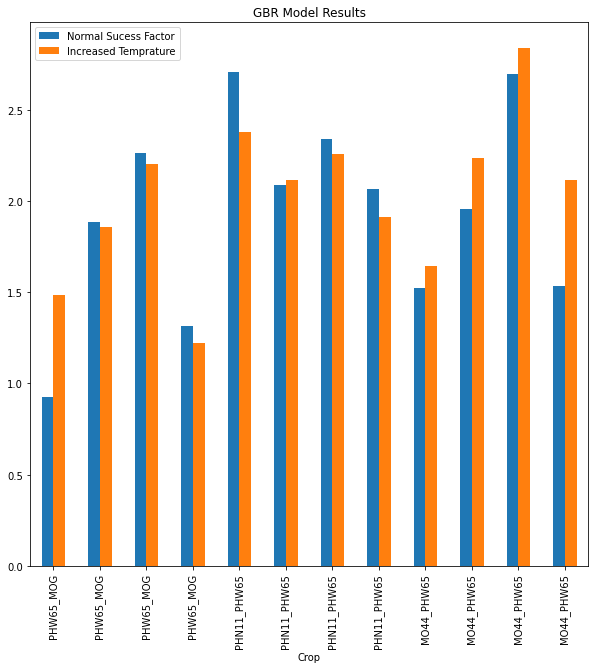

In [ ]:
Temp_Plot_Data.plot(kind="bar", title = "GBR Model Results", figsize = (10,10),legend = "False")